# Task-6 Prediction using Decision Tree Algorithm


##### Author: Kapish Bhardwaj

## Problem: Create the Decision Tree classifier and visualize it graphically.

## Solution:

### Importing Important Libraries:

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Loading the dataset:

iris = pd.read_csv('Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Dropping the 'Id' Column:

iris.drop('Id', axis = 1, inplace = True)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# Q-1: How many data-points and features?

print(iris.shape)

(150, 5)


In [6]:
# Q-2: what are the column names in our dataset?

print(iris.columns)

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [7]:
# Q-3: to check the class and data-types of all the features?

iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
# Q-4: to view some basic statistical datails?

iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
# Q-5: how many flowers for each species are present?

iris["Species"].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

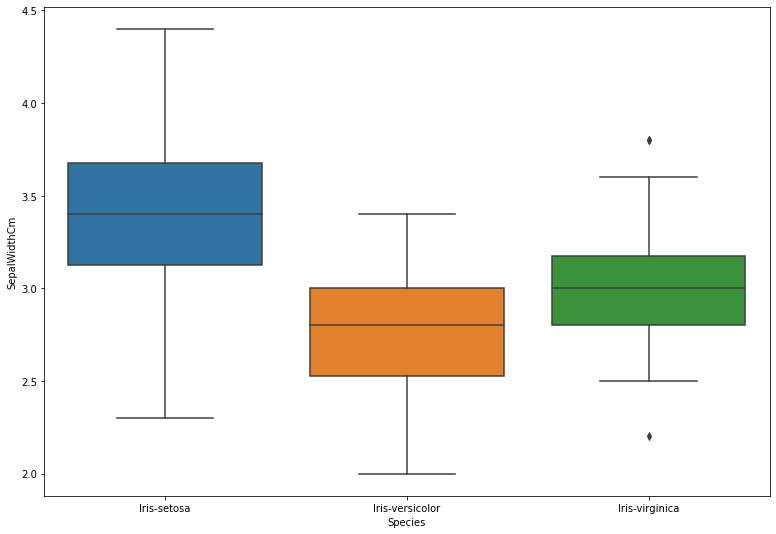

In [10]:
# checking for Outliers:

plt.figure(figsize=(13,9))
sns.load_dataset("iris")
sns.boxplot(x="Species", y="SepalWidthCm", data=iris)

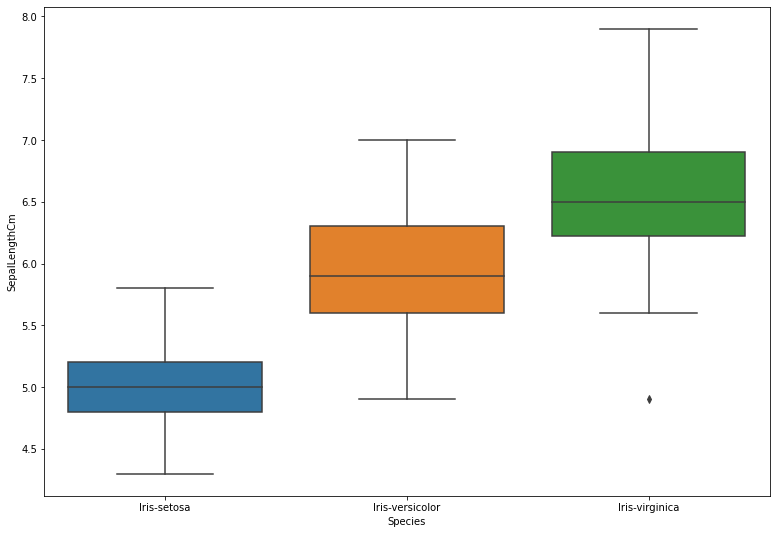

In [11]:
plt.figure(figsize=(13,9))
sns.load_dataset("iris")
sns.boxplot(x="Species", y="SepalLengthCm", data=iris)

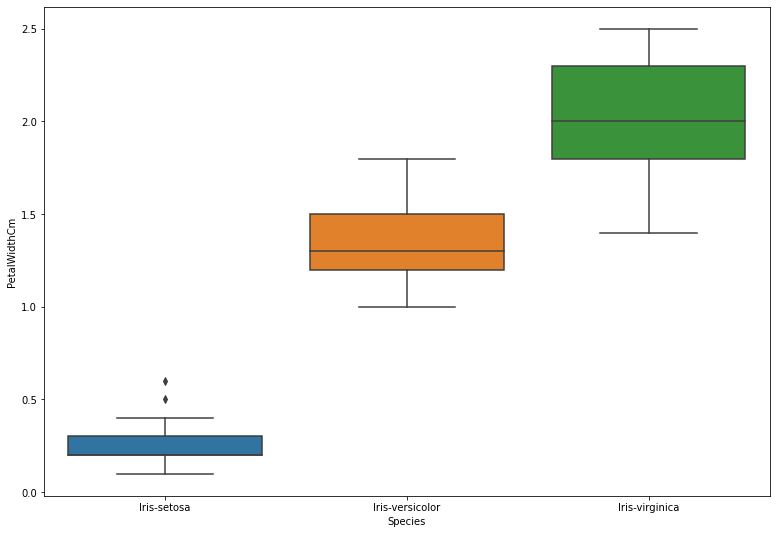

In [12]:
plt.figure(figsize=(13,9))
sns.load_dataset("iris")
sns.boxplot(x="Species", y="PetalWidthCm", data=iris)

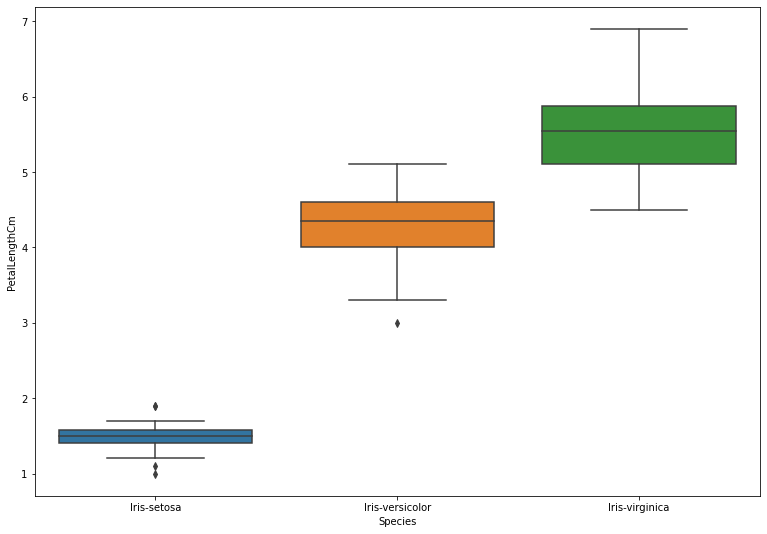

In [13]:
plt.figure(figsize=(13,9))
sns.load_dataset("iris")
sns.boxplot(x="Species", y="PetalLengthCm", data=iris)

## Correlation Matrix

In [14]:
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


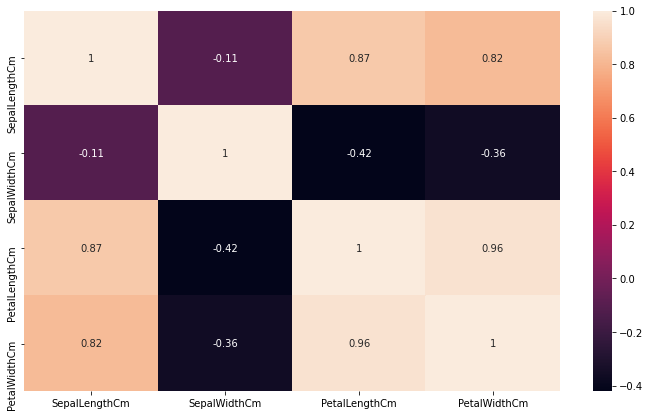

In [15]:
plt.figure(figsize = (12,7))
sns.heatmap(iris.corr(), annot = True)

##### It is observed that the SepalWidth and SepalLength are less correlated, whereas PetalWidth and Petallength are highly correlated.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


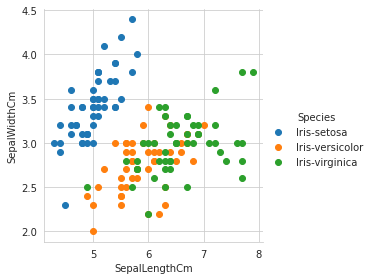

In [16]:
# To check how the data-points are seperared, scatter-plot is used.

sns.set_style("whitegrid");
sns.FacetGrid(iris, hue = "Species", size = 4) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend();
plt.show();

### Observation(s):

1. Using Sepal_LengthCm and Sepal_WidthCm features, We can easily distinguish Setosa flowers from others.
2. Seperating Versicolor from veronica is much harder as they have considerable overlap.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


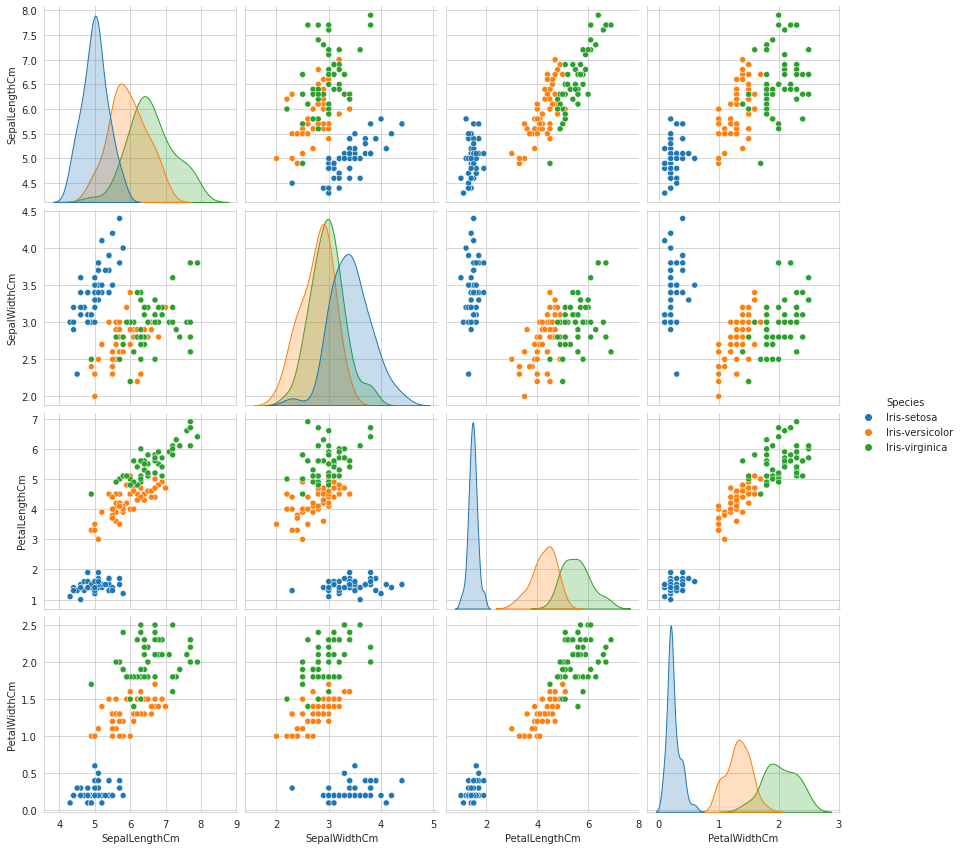

In [17]:
# TO see the distribution of all features by species, pair-plot is used.

sns.set_style("whitegrid");
sns.pairplot(iris, hue = "Species", size = 3);
plt.show;

### Observation(s);

1. Petal_Length and Petal_Width are the most useful features to identify various flower types.
2. While Setosa can be easily identified(linearly seperable), virnica and versicolor have some overlap(almost linearly seperable.

## Decision Tree Algorithm

In [18]:
# splitting the dataset:

x = iris.loc[:,['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [19]:
target = iris.loc[:,['Species']]
target.head()

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [30]:
# Performimg one hot encoding in 'Species' column:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
target= le.fit_transform(target)
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [23]:
# Creating Species Dataframe:

columns = ['Species']
target = np.array(['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
                   '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
                   '0', '0', '0', '0', '0', '0', '1','1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
                   '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
                   '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
                   '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
                   '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2'])

y = pd.DataFrame(data = target, columns = columns)

In [24]:
y.head()

,Species
0,0
1,0
2,0
3,0
4,0


In [37]:
# Splitting the dataset into train and test:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test  = train_test_split(x,y,test_size=0.2,random_state=0)

In [38]:
# Defining the decision tree algorithm:

from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(x,y)

print('Decision Tree Classifer Created!')

Decision Tree Classifer Created!


### Let us visualize the Decision Tree to understand it better.

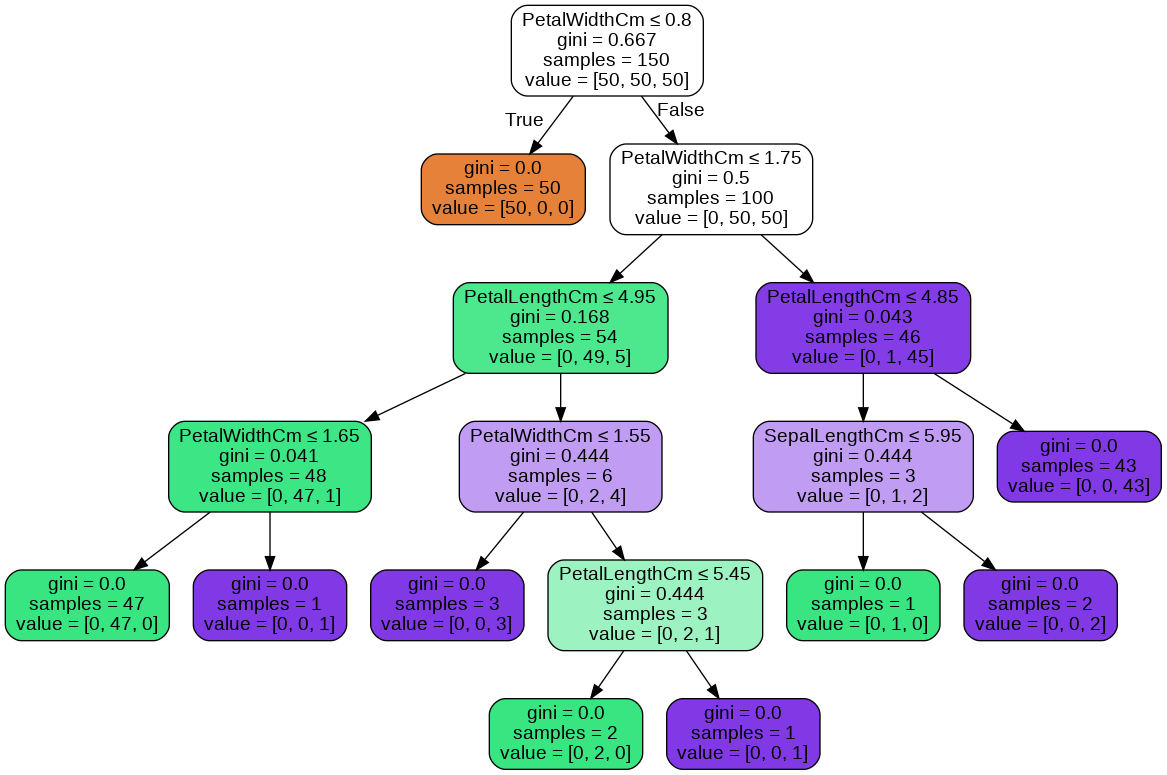

In [29]:
# Import necessary libraries for graph viz:

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph:

dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=x.columns,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

**We can now feed any new/test data to this classifer and it would be able to predict the right class accordingly.**